# Covid 19
<a id= "covid19"></a>

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import re
import math
from datetime import date
import csv
import warnings
warnings.filterwarnings("ignore")

In [2]:
url="https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data"
html=urlopen(url)

soup=BeautifulSoup(html,'lxml')

In [3]:
table = soup.find_all('tbody')

In [4]:
rows=soup.find_all('tr')

In [5]:
a=[]
for row in rows:
    row_td=row.find_all("td")
    str_cells=str(row_td)
    cleantext=BeautifulSoup(str_cells,"lxml").get_text()
    a.append(cleantext[1:-1].split(', '))

In [6]:
a=a[2:230]

In [7]:
a

[['2,017,335\n', '113,517\n', '541,116\n', '[9]\n'],
 ['742,084\n', '38,497\n', '325,602\n', '[13][14]\n'],
 ['485,253\n', '6,142\n', '242,397\n', '[15]\n'],
 ['289,140\n', '40,883\n', 'No data\n', '[17][18]\n'],
 ['276,583\n', '7,745\n', '135,206\n', '[19]\n'],
 ['241,966\n', '27,136\n', '150,376\n', '[20]\n'],
 ['235,561\n', '34,043\n', '168,646\n', '[21][22]\n'],
 ['203,736\n', '5,738\n', '92,929\n', '[23][24]\n'],
 ['186,516\n', '8,831\n', '170,134\n', '[26][25]\n'],
 ['175,927\n', '8,425\n', '138,457\n', '[27]\n'],
 ['172,114\n', '4,729\n', '144,598\n', '[28]\n'],
 ['154,591\n', '29,296\n', '71,506\n', '[29]\n'],
 ['142,759\n', '2,283\n', 'No data\n', '[30]\n'],
 ['124,301\n', '14,649\n', '91,412\n', '[31][32]\n'],
 ['113,702\n', '2,255\n', '36,308\n', '[33]\n'],
 ['108,571\n', '783\n', '76,339\n', '[34]\n'],
 ['96,653\n', '7,897\n', '55,571\n', '[35]\n'],
 ['83,046\n', '4,634\n', '78,357\n', '[36]\n'],
 ['70,879\n', '62\n', '47,569\n', '[37]\n'],
 ['71,675\n', '975\n', '15,336\n'

In [8]:
for i in range(len(a)):
    a[i].pop()
    for j in range(len(a[i])):
        a[i][j]=a[i][j].rstrip("\n")
        if (a[i][j]=='No data'):
            a[i][j]=None
        else:
            a[i][j]=int(a[i][j].replace(",",""))

In [9]:
a

[[2017335, 113517, 541116],
 [742084, 38497, 325602],
 [485253, 6142, 242397],
 [289140, 40883, None],
 [276583, 7745, 135206],
 [241966, 27136, 150376],
 [235561, 34043, 168646],
 [203736, 5738, 92929],
 [186516, 8831, 170134],
 [175927, 8425, 138457],
 [172114, 4729, 144598],
 [154591, 29296, 71506],
 [142759, 2283, None],
 [124301, 14649, 91412],
 [113702, 2255, 36308],
 [108571, 783, 76339],
 [96653, 7897, 55571],
 [83046, 4634, 78357],
 [70879, 62, 47569],
 [71675, 975, 15336],
 [59437, 9619, 16324],
 [52991, 1162, 29006],
 [50265, 282, 24506],
 [47903, 6031, None],
 [45924, 4717, None],
 [43917, 3690, 4375],
 [42078, 1372, 16534],
 [39904, 283, 22740],
 [38514, 25, 25877],
 [36829, 1306, 9786],
 [35306, 1492, 21339],
 [33140, 273, 22162],
 [33076, 1923, 11414],
 [30988, 1663, 28700],
 [27856, 810, 12412],
 [27560, 1183, 13196],
 [25215, 1691, 22698],
 [24748, 717, 7555],
 [22992, 1017, 4736],
 [21459, 384, 2651],
 [20749, 1345, 14910],
 [20415, 544, 12208],
 [18198, 83, 4152],
 [

In [10]:
df = pd.DataFrame(a)

In [11]:
country_list=[]
for row in rows:
    row_th=row.find_all("th")
    str_cells=str(row_th)
    country=BeautifulSoup(str_cells,"lxml").get_text()
    country_list.append(country)

country_list

['[Location[a]\n, Cases[b]\n, Deaths[c]\n, Recov.[d]\n, Ref.\n]',
 '[Worldwide\n, 7,185,573\n, 408,954\n, 3,352,665\n, [2]\n]',
 '[\n, United States[e]\n]',
 '[\n, Brazil[f]\n]',
 '[\n, Russia[g]\n]',
 '[\n, United Kingdom[h]\n]',
 '[\n, India\n]',
 '[\n, Spain[i]\n]',
 '[\n, Italy\n]',
 '[\n, Peru\n]',
 '[\n, Germany[j]\n]',
 '[\n, Iran\n]',
 '[\n, Turkey\n]',
 '[\n, France[k]\n]',
 '[\n, Chile[l]\n]',
 '[\n, Mexico\n]',
 '[\n, Pakistan\n]',
 '[\n, Saudi Arabia\n]',
 '[\n, Canada\n]',
 '[\n, China[m]\n]',
 '[\n, Qatar\n]',
 '[\n, Bangladesh\n]',
 '[\n, Belgium[n]\n]',
 '[\n, South Africa\n]',
 '[\n, Belarus\n]',
 '[\n, Netherlands[o]\n]',
 '[\n, Sweden\n]',
 '[\n, Ecuador\n]',
 '[\n, Colombia\n]',
 '[\n, United Arab Emirates\n]',
 '[\n, Singapore\n]',
 '[\n, Egypt[p]\n]',
 '[\n, Portugal\n]',
 '[\n, Kuwait\n]',
 '[\n, Indonesia\n]',
 '[\n, Switzerland\n]',
 '[\n, Ukraine[q]\n]',
 '[\n, Poland\n]',
 '[\n, Ireland\n]',
 '[\n, Argentina[r]\n]',
 '[\n, Philippines\n]',
 '[\n, Afghanistan\

In [12]:
country_list=country_list[2:230]
for i in range(len(country_list)):
    country_list[i]=country_list[i][4:].upper()
country_list

['UNITED STATES[E]\n]',
 'BRAZIL[F]\n]',
 'RUSSIA[G]\n]',
 'UNITED KINGDOM[H]\n]',
 'INDIA\n]',
 'SPAIN[I]\n]',
 'ITALY\n]',
 'PERU\n]',
 'GERMANY[J]\n]',
 'IRAN\n]',
 'TURKEY\n]',
 'FRANCE[K]\n]',
 'CHILE[L]\n]',
 'MEXICO\n]',
 'PAKISTAN\n]',
 'SAUDI ARABIA\n]',
 'CANADA\n]',
 'CHINA[M]\n]',
 'QATAR\n]',
 'BANGLADESH\n]',
 'BELGIUM[N]\n]',
 'SOUTH AFRICA\n]',
 'BELARUS\n]',
 'NETHERLANDS[O]\n]',
 'SWEDEN\n]',
 'ECUADOR\n]',
 'COLOMBIA\n]',
 'UNITED ARAB EMIRATES\n]',
 'SINGAPORE\n]',
 'EGYPT[P]\n]',
 'PORTUGAL\n]',
 'KUWAIT\n]',
 'INDONESIA\n]',
 'SWITZERLAND\n]',
 'UKRAINE[Q]\n]',
 'POLAND\n]',
 'IRELAND\n]',
 'ARGENTINA[R]\n]',
 'PHILIPPINES\n]',
 'AFGHANISTAN\n]',
 'ROMANIA\n]',
 'DOMINICAN REPUBLIC\n]',
 'OMAN\n]',
 'ISRAEL[S]\n]',
 'JAPAN[T]\n]',
 'AUSTRIA\n]',
 'PANAMA\n]',
 'BAHRAIN\n]',
 'IRAQ\n]',
 'BOLIVIA\n]',
 'ARMENIA\n]',
 'NIGERIA\n]',
 'KAZAKHSTAN\n]',
 'DENMARK[U]\n]',
 'SERBIA[V]\n]',
 'SOUTH KOREA\n]',
 'ALGERIA\n]',
 'GHANA\n]',
 'MOLDOVA[W]\n]',
 'CZECH REPUBLIC\n

In [13]:
c=[]
countries=[]
for i in range(len(country_list)):
    c=re.findall(r"[A-Z\s]*",country_list[i])
    x=c[0].replace("\n","")
    countries.append(x)

In [14]:
count_dict={}
for idx,i in enumerate(countries):
    count_dict[idx]=i
count_ser=pd.Series(count_dict)

In [15]:
count_ser

0       UNITED STATES
1              BRAZIL
2              RUSSIA
3      UNITED KINGDOM
4               INDIA
            ...      
223          ANGUILLA
224              SABA
225           BONAIRE
226    SINT EUSTATIUS
227     SAINT PIERRE 
Length: 228, dtype: object

In [16]:
df['Country']=count_ser

df=df[['Country',0,1,2]]

rename={0:'Cases',1:'Deaths', 2:'Recovered'}
df=df.rename(columns=rename)

df['Recovered']=df['Recovered'].fillna(0)
df['Recovered']=df['Recovered'].apply(lambda x:math.trunc(x))

In [17]:
df.head(25)

,Country,Cases,Deaths,Recovered
0,UNITED STATES,2017335,113517,541116
1,BRAZIL,742084,38497,325602
2,RUSSIA,485253,6142,242397
3,UNITED KINGDOM,289140,40883,0
4,INDIA,276583,7745,135206
5,SPAIN,241966,27136,150376
6,ITALY,235561,34043,168646
7,PERU,203736,5738,92929
8,GERMANY,186516,8831,170134
9,IRAN,175927,8425,138457


In [18]:
new_df=df[:10]

In [19]:
topr=soup.find_all("tr", class_='sorttop')
topr=str(topr)
headtext=BeautifulSoup(topr,"lxml").get_text()

headtext=headtext[1:-1].replace("\n\n","-")

headtext=headtext.split("-")
headtext.pop()

for i in range(len(headtext)):
    if(i==0):
        headtext[i]='WORLD'
    else:
        headtext[i]=int(headtext[i].replace(",",""))

headtext=[headtext]

new_df =new_df.append(pd.DataFrame(headtext, columns=new_df.columns),ignore_index=True)

In [20]:
new_df['Date']=date.today()

In [21]:
new_df

,Country,Cases,Deaths,Recovered,Date
0,UNITED STATES,2017335,113517,541116,2020-06-10
1,BRAZIL,742084,38497,325602,2020-06-10
2,RUSSIA,485253,6142,242397,2020-06-10
3,UNITED KINGDOM,289140,40883,0,2020-06-10
4,INDIA,276583,7745,135206,2020-06-10
5,SPAIN,241966,27136,150376,2020-06-10
6,ITALY,235561,34043,168646,2020-06-10
7,PERU,203736,5738,92929,2020-06-10
8,GERMANY,186516,8831,170134,2020-06-10
9,IRAN,175927,8425,138457,2020-06-10


# Update it once in a day

In [22]:
# for idx,i in enumerate(new_df['Country']):
#     country_row=new_df.loc[[idx]]
#     with open('{0}.csv'.format(i),'a') as f:
#         country_row.to_csv(f, header=False)

In [23]:
cases_df=new_df[['Country','Cases']]
deaths_df=new_df[['Country','Deaths']]
recovered_df=new_df[['Country','Recovered']]

In [24]:
timeline_col=[]
timeline_col.append('Date')
for i in new_df.Country:
    timeline_col.append(i)
print(timeline_col)

cases=pd.DataFrame(columns=timeline_col)
Deaths=pd.DataFrame(columns=timeline_col)
Recovered=pd.DataFrame(columns=timeline_col)

['Date', 'UNITED STATES', 'BRAZIL', 'RUSSIA', 'UNITED KINGDOM', 'INDIA', 'SPAIN', 'ITALY', 'PERU', 'GERMANY', 'IRAN', 'WORLD']


In [25]:
Deaths

,Date,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,INDIA,SPAIN,ITALY,PERU,GERMANY,IRAN,WORLD


In [26]:
trans_df=new_df.transpose()

trans_df.columns=trans_df.loc['Country']
trans_df=trans_df.drop(['Country','Date'] , axis=0)
trans_df['DATE']=date.today()
trans_df

Country,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,INDIA,SPAIN,ITALY,PERU,GERMANY,IRAN,WORLD,DATE
Cases,2017335,742084,485253,289140,276583,241966,235561,203736,186516,175927,7185573,2020-06-10
Deaths,113517,38497,6142,40883,7745,27136,34043,5738,8831,8425,408954,2020-06-10
Recovered,541116,325602,242397,0,135206,150376,168646,92929,170134,138457,3352665,2020-06-10


In [27]:
cases=trans_df.loc[['Cases']]
Deaths=trans_df.loc[['Deaths']]
Recovered=trans_df.loc[['Recovered']]

In [28]:
cases

Country,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,INDIA,SPAIN,ITALY,PERU,GERMANY,IRAN,WORLD,DATE
Cases,2017335,742084,485253,289140,276583,241966,235561,203736,186516,175927,7185573,2020-06-10


In [29]:
Deaths

Country,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,INDIA,SPAIN,ITALY,PERU,GERMANY,IRAN,WORLD,DATE
Deaths,113517,38497,6142,40883,7745,27136,34043,5738,8831,8425,408954,2020-06-10


In [30]:
Recovered

Country,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,INDIA,SPAIN,ITALY,PERU,GERMANY,IRAN,WORLD,DATE
Recovered,541116,325602,242397,0,135206,150376,168646,92929,170134,138457,3352665,2020-06-10


# Update it once a day

In [31]:
# cases.to_csv('cases.csv', mode='a', header=True)
# Deaths.to_csv('death.csv', mode='a', header=True)
# Recovered.to_csv('recovered.csv', mode='a', header=True)

In [32]:
pd.read_csv('cases.csv')

,Unnamed: 0,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,GERMANY,INDIA,TURKEY,FRANCE,WORLD,DATE
0,Cases,1783132,468338,396575,271222,238564,232248,183019,173763,162120,149668,5919364,2020-05-30
1,NaN,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,GERMANY,INDIA,TURKEY,PERU,WORLD,DATE
2,Cases,1805745,498440,396575,272826,239228,232664,183294,182143,163103,155671,6054187,2020-05-31
3,NaN,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,INDIA,GERMANY,PERU,TURKEY,WORLD,DATE
4,Cases,1825803,514992,414878,274762,239429,233019,190535,183494,164476,163942,6152160,2020-06-01
5,NaN,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,INDIA,GERMANY,PERU,TURKEY,WORLD,DATE
6,Cases,1847809,529405,414878,276332,239638,233197,198706,183765,170039,164769,6259887,2020-06-02
7,NaN,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,INDIA,GERMANY,PERU,TURKEY,WORLD,DATE
8,Cases,1869013,558237,423741,277985,239932,233515,207615,184091,174884,165555,6378237,2020-06-03
9,NaN,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,INDIA,GERMANY,PERU,TURKEY,WORLD,DATE


In [33]:
pd.read_csv('death.csv')

,Unnamed: 0,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,GERMANY,INDIA,TURKEY,FRANCE,WORLD,DATE
0,Deaths,104166,27944,4555,38161,27121,33229,8594,4971,4489,28714,364459,2020-05-30
1,NaN,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,GERMANY,INDIA,TURKEY,PERU,WORLD,DATE
2,Deaths,105159,28834,4555,38376,27125,33340,8600,5164,4515,4371,368711,2020-05-31
3,NaN,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,INDIA,GERMANY,PERU,TURKEY,WORLD,DATE
4,Deaths,105770,29341,4855,38489,27127,33415,5394,8605,4506,4540,371700,2020-06-01
5,NaN,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,INDIA,GERMANY,PERU,TURKEY,WORLD,DATE
6,Deaths,106563,30058,4855,39045,27127,33475,5598,8618,4634,4563,375208,2020-06-02
7,NaN,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,INDIA,GERMANY,PERU,TURKEY,WORLD,DATE
8,Deaths,107648,31309,5037,39369,27127,33530,5815,8674,4767,4585,380251,2020-06-03
9,NaN,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,INDIA,GERMANY,PERU,TURKEY,WORLD,DATE


In [34]:
pd.read_csv('recovered.csv')

,Unnamed: 0,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,GERMANY,INDIA,TURKEY,FRANCE,WORLD,DATE
0,Recovered,384821,189476,167469,0,150376,152844,163941,82370,125963,67803,2490221,2020-05-30
1,NaN,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,GERMANY,INDIA,TURKEY,PERU,WORLD,DATE
2,Recovered,390404,200892,167469,0,150376,155633,164829,86984,126984,66447,2562191,2020-05-31
3,NaN,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,INDIA,GERMANY,PERU,TURKEY,WORLD,DATE
4,Recovered,398283,206555,175877,0,150376,157507,91819,165226,67208,127973,2637496,2020-06-01
5,NaN,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,INDIA,GERMANY,PERU,TURKEY,WORLD,DATE
6,Recovered,412285,211080,175877,0,150376,158355,95527,165834,68507,128947,2692528,2020-06-02
7,NaN,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,INDIA,GERMANY,PERU,TURKEY,WORLD,DATE
8,Recovered,420747,240627,186985,0,150376,160092,100303,166428,69257,129921,2729509,2020-06-03
9,NaN,UNITED STATES,BRAZIL,RUSSIA,UNITED KINGDOM,SPAIN,ITALY,INDIA,GERMANY,PERU,TURKEY,WORLD,DATE


# Visualisation

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

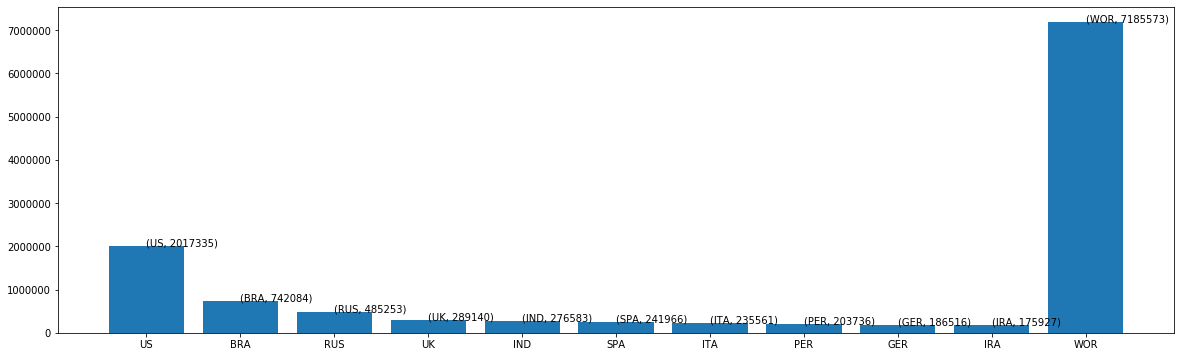

In [36]:
new_df["Code"]=None

for i in new_df['Country']:
    if (i=='UNITED STATES'):
        new_df['Code'][new_df['Country']==i]='US'
    elif (i=='UNITED KINGDOM'):
        new_df['Code'][new_df['Country']==i]='UK'
    else:
        new_df['Code'][new_df['Country']==i]=i[0:3]

plt.rcParams["figure.figsize"]=[20.0,6.0]
fig = plt.figure()
ax = fig.add_subplot(111)

A = new_df['Code']
B = new_df['Cases']

plt.bar(A,B)
for xy in zip(A, B):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

In [37]:
cdf=[]
count_cols=['Date','Cases','Deaths','Recovered']
for idx,i in enumerate(new_df['Country']):
    temp=pd.read_csv('{0}.csv'.format(i))
    temp=temp[count_cols]
    cdf.append(temp)

count_name=list(new_df['Country'])

for i in range(11):
    cdf[i].set_index(['Date'], inplace=True)

In [38]:
population={'UNITED STATES':331002651,'BRAZIL':212559417,'RUSSIA':145934462,'UNITED KINGDOM':67886011,'SPAIN':46754778,'ITALY':60461826,'INDIA':1380004385,'GERMANY':83783942,'PERU':32971854,'TURKEY':84339067,'IRAN':83183741,'WORLD':7713468000}

upd_df=new_df
upd_df['Death_rate']=round(upd_df['Deaths']/upd_df['Cases']*100,3)
new_df=new_df.drop(columns=['Death_rate'])
upd_df=upd_df[['Country','Death_rate']]
upd_df

gr={}
cname=list(upd_df.Country)
for i in range(11):
    cgr=round((cdf[i]['Cases'][-1]-cdf[i]['Cases'][-2])/cdf[i]['Cases'][-1]*100,3)
    gr[cname[i]]=cgr

upd_df['GR_Cases']=None
for i in list(upd_df.Country):
    upd_df['GR_Cases'][upd_df['Country']==i]=gr[i]

upd_df['Cases_by_Population']=None
cname=list(upd_df.Country)
for i in range(11):
    upd_df['Cases_by_Population'][upd_df['Country']==cname[i]]=round(new_df['Cases'][new_df['Country']==cname[i]]/population[cname[i]]*100,3)


In [39]:
dfprac=upd_df[['Country','Death_rate']]
dfprac=dfprac.sort_values('Death_rate',ascending=False)
print(dfprac,"\n")
dfprac=upd_df[['Country','GR_Cases']]
dfprac=dfprac.sort_values('GR_Cases',ascending=False)
print(dfprac,"\n")
dfprac=upd_df[['Country','Cases_by_Population']]
dfprac=dfprac.sort_values('Cases_by_Population',ascending=False)
print(dfprac)

           Country  Death_rate
6            ITALY      14.452
3   UNITED KINGDOM      14.140
5            SPAIN      11.215
10           WORLD       5.691
0    UNITED STATES       5.627
1           BRAZIL       5.188
9             IRAN       4.789
8          GERMANY       4.735
7             PERU       2.816
4            INDIA       2.800
2           RUSSIA       1.266 

           Country GR_Cases
1           BRAZIL    4.204
4            INDIA     3.61
7             PERU    1.983
2           RUSSIA    1.771
10           WORLD    1.387
9             IRAN    1.191
0    UNITED STATES    0.876
3   UNITED KINGDOM    0.602
8          GERMANY    0.152
6            ITALY     0.12
5            SPAIN    0.103 

           Country Cases_by_Population
7             PERU               0.618
0    UNITED STATES               0.609
5            SPAIN               0.518
3   UNITED KINGDOM               0.426
6            ITALY                0.39
1           BRAZIL               0.349
2           RUS

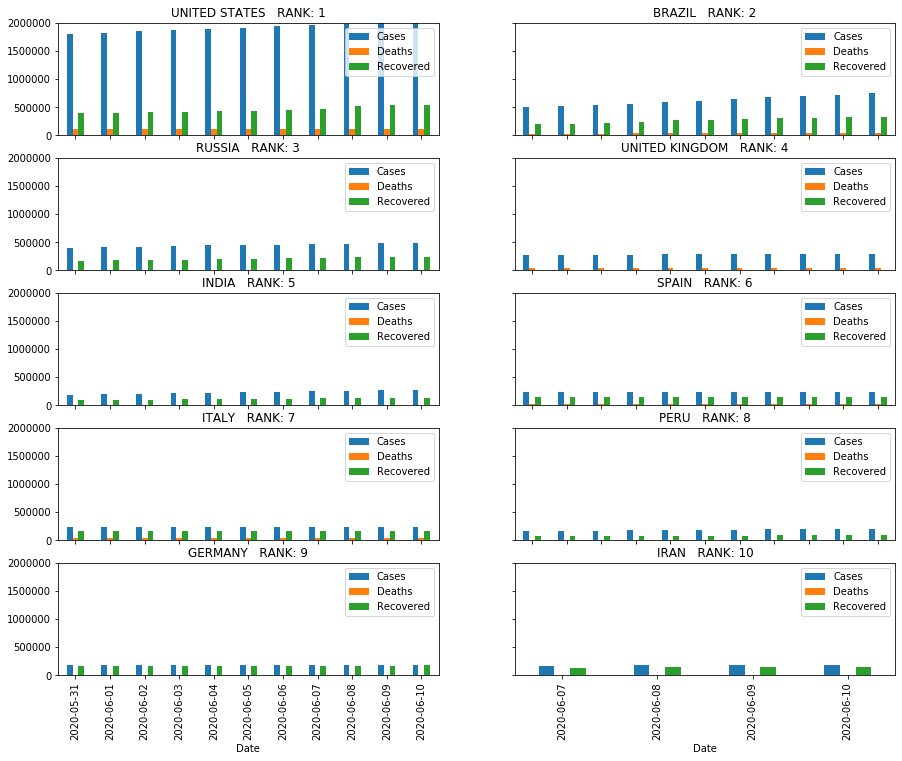

In [40]:
plt.rcParams["figure.figsize"]=[15.0,12.0]
fig,ax=plt.subplots(5,2)
count=0
for r in range(5):
    for c in range(2):
        cdf[count].plot.bar(ax=ax[r,c])
        ax[r,c].set_ylim(0, 2000000)
        nm=count_name[count]+"   RANK: "+str(count+1)
        ax[r,c].set_title(nm)
        count=count+1
for ax in fig.get_axes():
    ax.label_outer()
#     plt.set_title(cdf[0]['Country'])

In [41]:
def plot_covid(x,y,z):
    y=count_name.index(y)
    plt.rcParams["figure.figsize"]=[8.0,6.0]
    if (z=='Line'):
        plt.plot(cdf[y].index,cdf[y][x], marker='+', label=count_name[y])
        plt.xticks(rotation=70)
    elif(z=='Bar'):
        plt.bar(cdf[y].index,cdf[y][x],label=count_name[y])
        plt.xticks(rotation=70)
    plt.legend()

In [42]:
from ipywidgets import *
x = widgets.Dropdown(
        options=['Cases', 'Deaths','Recovered'],
        description='C & D'
    )
y = widgets.Dropdown(
        options=count_name,
        description='Country'
    )
z=widgets.Dropdown(
        options=['Line','Bar'],
        description='Graph Type'
    )
interactive(plot_covid, x=x, y=y, z=['Line', 'Bar'])

interactive(children=(Dropdown(description='C & D', options=('Cases', 'Deaths', 'Recovered'), value='Cases'), …

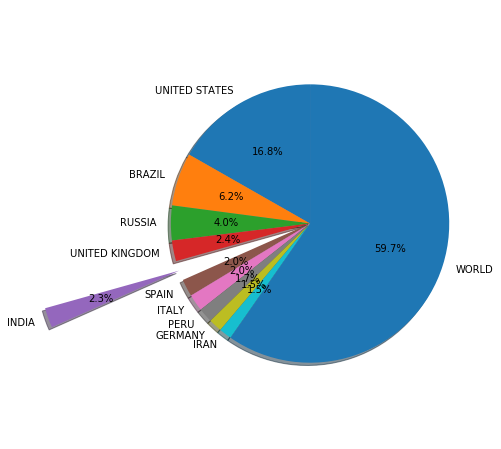

In [43]:
plt.rcParams["figure.figsize"]=[8.0,8.0]
fig1, ax = plt.subplots()
e=[]
for i in range(11):
    if(new_df.loc[i]['Country']=='INDIA'):
        e.append(1)
    else:
        e.append(0)
ax.pie(new_df['Cases'],explode=e,labels=new_df['Country'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [44]:
def plot_trends(x):
    plt.rcParams["figure.figsize"]=[8.0,6.0]
    markers=['.','D','o','8','s','+','_','1','2','3','*']
    for i in range(11):
        plt.plot(cdf[i].index,cdf[i][x], marker=markers[i], label=count_name[i])
    plt.legend()
    plt.xticks(rotation=70)
    plt.yscale('log')

In [45]:
from ipywidgets import *
x = widgets.Dropdown(
        options=['Cases', 'Deaths','Recovered'],
        description='Trend of'
    )
interactive(plot_trends, x=x)

interactive(children=(Dropdown(description='Trend of', options=('Cases', 'Deaths', 'Recovered'), value='Cases'…